## Objective:
- The objective from this project is to create a <b>Logistic Regression Classifier</b> to predict the <b>Stroke Condition</b>.
- <b>Stoke</b> is a condition in which either the blood flow to the brain stops or blood flow is excessive.
- It is required to obtain <b>ROC > 0.65</b>.

### Data:
- Data is provided in csv format in a file named <b>healthcare-dataset-stroke-data.csv</b>

### Column names and data types are as follow:
- id, integer.
- gender, string.
- age, double.
- hypertension, integer.
- heart_disease, integer.
- ever_married, string.
- work_type, string.
- Residence_type, string.
- avg_glucose_level, double.
- bmi, double.
- smoking_status, string.
- stroke, integer <b>(Target Label)</b>.
If the person has stroke the stroke label value is <b>"1"</b> otherwise <b>"0"</b>.

### Create a spark session and import the required libraries

In [1]:
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [2]:
import pyspark.sql.functions as F
from pyspark.sql.types import StructField, StructType, StringType, DoubleType, IntegerType
import seaborn as sns

### Create a data schema programatically

In [3]:
myschema = StructType([StructField('id', IntegerType()),
                       StructField('gender', StringType()),
                       StructField('age', DoubleType()),
                       StructField('hypertension', IntegerType()),
                       StructField('heart_disease', IntegerType()),
                       StructField('ever_married', StringType()),
                       StructField('work_type', StringType()),
                       StructField('Residence_type', StringType()),
                       StructField('avg_glucose_level', DoubleType()),
                       StructField('bmi', DoubleType()),
                       StructField('smoking_status', StringType()),
                       StructField('stroke', IntegerType()),
                      ])

In [4]:
data = spark.read.format("csv") \
      .option("header", True) \
      .schema(myschema) \
      .load("healthcare-dataset-stroke-data.csv")


# data = spark.read.csv("healthcare-dataset-stroke-data.csv", header="true", inferSchema="true")

In [5]:
data.show()

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
| 9046|  Male|67.0|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|formerly smoked|     1|
|51676|Female|61.0|           0|            0|         Yes|Self-employed|         Rural|           202.21|null|   never smoked|     1|
|31112|  Male|80.0|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|   never smoked|     1|
|60182|Female|49.0|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|         smokes|     1|
| 1665|Female|79.0|           1|            0|         

In [6]:
data.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: string (nullable = true)
 |-- stroke: integer (nullable = true)



In [7]:
data.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: string (nullable = true)
 |-- stroke: integer (nullable = true)



### Read the data using the standard DataReader (Key,Value) pairs format
- Provide the schema and any other required options.

In [8]:
# data = spark.read.csv("healthcare-dataset-stroke-data.csv", header="true", schema=Schema)

### Explore the data 
#### You have to do the following:
- Print the Schema.
- Show the first 10 rows from the data.
- Explore null values and show how many null values in each column.
- Plot a count plot for the target label and <b>notice the graph</b>.
- Perform any additional EDA you find useful.

In [10]:
data.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: string (nullable = true)
 |-- stroke: integer (nullable = true)



In [11]:
data.show(10)

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
| 9046|  Male|67.0|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|formerly smoked|     1|
|51676|Female|61.0|           0|            0|         Yes|Self-employed|         Rural|           202.21|null|   never smoked|     1|
|31112|  Male|80.0|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|   never smoked|     1|
|60182|Female|49.0|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|         smokes|     1|
| 1665|Female|79.0|           1|            0|         

In [12]:
null_df = data.agg(*[F.count(F.when(F.isnull(c), c)).alias(c) for c in data.columns])

In [13]:
null_df.show()

+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
| id|gender|age|hypertension|heart_disease|ever_married|work_type|Residence_type|avg_glucose_level|bmi|smoking_status|stroke|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
|  0|     0|  0|           0|            0|           0|        0|             0|                0|201|             0|     0|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+



In [16]:
data.describe().show()

+-------+-----------------+------+------------------+------------------+-------------------+------------+---------+--------------+------------------+------------------+--------------+-------------------+
|summary|               id|gender|               age|      hypertension|      heart_disease|ever_married|work_type|Residence_type| avg_glucose_level|               bmi|smoking_status|             stroke|
+-------+-----------------+------+------------------+------------------+-------------------+------------+---------+--------------+------------------+------------------+--------------+-------------------+
|  count|             5110|  5110|              5110|              5110|               5110|        5110|     5110|          5110|              5110|              4909|          5110|               5110|
|   mean|36517.82935420744|  null|43.226614481409015|0.0974559686888454|0.05401174168297456|        null|     null|          null|106.14767710371804|28.893236911794673|          null| 

In [17]:
df=data.toPandas()

In [18]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<AxesSubplot:xlabel='count', ylabel='stroke'>

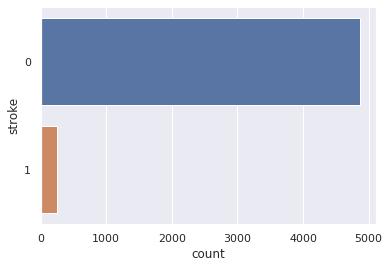

In [19]:
sns.set_theme(style="darkgrid")
sns.countplot(y="stroke",data=df)

In [20]:
# sns.histplot(x='age',data=df , kde=True , bins=30)

### Get the summary statistics of the age column
- You will find the minimum age is about <b>0.08</b>.
- Remove rows for the age below <b>2 years old</b>.

In [21]:
data.describe(['age']).show()

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|              5110|
|   mean|43.226614481409015|
| stddev| 22.61264672311348|
|    min|              0.08|
|    max|              82.0|
+-------+------------------+



In [22]:
filtered_df = data.filter(data['age']>=2)

In [23]:
filtered_df.describe(['age']).show()

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|              4990|
|   mean| 44.23907815631262|
| stddev|21.908077881917443|
|    min|               2.0|
|    max|              82.0|
+-------+------------------+



### Working with gender & smoking_status columns:
- Select and show the gender & smoking_status columns
- Get the distinct values for each column.

In [24]:
filtered_df.select("gender", "smoking_status").show()

+------+---------------+
|gender| smoking_status|
+------+---------------+
|  Male|formerly smoked|
|Female|   never smoked|
|  Male|   never smoked|
|Female|         smokes|
|Female|   never smoked|
|  Male|formerly smoked|
|  Male|   never smoked|
|Female|   never smoked|
|Female|        Unknown|
|Female|        Unknown|
|Female|   never smoked|
|Female|         smokes|
|Female|         smokes|
|  Male|        Unknown|
|Female|   never smoked|
|Female|   never smoked|
|  Male|         smokes|
|  Male|         smokes|
|Female|   never smoked|
|  Male|        Unknown|
+------+---------------+
only showing top 20 rows



In [25]:
# data_filtered.select(F.col("gender"),F.col("smoking_status")).show()

In [26]:
filtered_df.select('gender').distinct().show()

+------+
|gender|
+------+
|Female|
| Other|
|  Male|
+------+



In [27]:
filtered_df.select('smoking_status').distinct().show()

+---------------+
| smoking_status|
+---------------+
|         smokes|
|        Unknown|
|   never smoked|
|formerly smoked|
+---------------+



#### Change the string values of the columns into numerical values as follow:
1. Gender column:
    * Male = 1 
    * Female = 0 
    * Other = 0 
2. Smoking Status column:
  * never smoked = 0
  * Unknown = 0.5
  * formerly smoked = 0.75
  * smokes = 1.0


In [29]:
filtered_df  =filtered_df.withColumn("gender", F.when(F.col("gender")=='Male', 1)\
                                               .when(F.col("gender")=='Female', 0)\
                                               .otherwise(0))

In [30]:
filtered_df = filtered_df.withColumn("smoking_status", F.when(F.col("smoking_status")=='never smoked', 0)\
                                       .when(F.col("smoking_status")=='formerly smoked',0.75)\
                                       .when(F.col("smoking_status")=='smokes',1).otherwise(0.5))

#### Show the output DataFrame
- Select and show the gender & smoking_status columns after value changing.
- Print schema for the new dataframe.

In [33]:
filtered_df.select(F.col("gender"),F.col("smoking_status")).show()

+------+--------------+
|gender|smoking_status|
+------+--------------+
|     1|          0.75|
|     0|           0.0|
|     1|           0.0|
|     0|           1.0|
|     0|           0.0|
|     1|          0.75|
|     1|           0.0|
|     0|           0.0|
|     0|           0.5|
|     0|           0.5|
|     0|           0.0|
|     0|           1.0|
|     0|           1.0|
|     1|           0.5|
|     0|           0.0|
|     0|           0.0|
|     1|           1.0|
|     1|           1.0|
|     0|           0.0|
|     1|           0.5|
+------+--------------+
only showing top 20 rows



In [34]:
filtered_df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: integer (nullable = false)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: double (nullable = false)
 |-- stroke: integer (nullable = true)



In [35]:
filtered_df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: integer (nullable = false)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: double (nullable = false)
 |-- stroke: integer (nullable = true)



### Deal with null value according to your data analysis.

#### Only bmi column contains null values, 

#### I'll impute the mean for the missing values

In [36]:
bmi_mean = filtered_df.select(F.mean("bmi")).collect()[0][0]

In [37]:

clean_df = filtered_df.fillna(bmi_mean, subset=['bmi'])

### Split the data into training and test dataframes:
- 80% training and 20% test.
- seed = 42.
- Save each dataframe as a parquet file

In [44]:
X_train, X_test = clean_df.randomSplit([0.8, 0.2],seed = 42)

In [45]:
type(X_train)

pyspark.sql.dataframe.DataFrame

In [46]:
X_train.write.parquet("train_11.parquet") 

In [47]:
X_test.write.parquet("test_22.parquet") 

### Read the saved Train and Test DataFrame:
- Use the dataframes you read in the subsequent steps.

In [48]:
X_trainPar=spark.read.parquet("train_11.parquet")

In [49]:
X_testPar=spark.read.parquet("test_22.parquet")

### Create the model:
- Perform feature engineering steps.
- Create the logistic regression classifier.
- Build the pipeline model that uses all feature engineering steps and the model.
- Train the pipeline model using the trainig dataset.

In [50]:
from pyspark.ml.feature import StringIndexer, VectorAssembler,OneHotEncoder
from pyspark.ml import Pipeline

In [51]:
X_trainPar.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: double (nullable = true)
 |-- stroke: integer (nullable = true)



In [52]:
clean_df = clean_df.withColumn("heart_disease", F.col("heart_disease").cast(StringType()))
clean_df = clean_df.withColumn("hypertension", F.col("hypertension").cast(StringType()))
clean_df = clean_df.withColumn("hypertension", F.col("hypertension").cast(StringType()))
clean_df = clean_df.withColumn("gender", F.col("gender").cast(StringType()))

X_trainPar = X_trainPar.withColumn("heart_disease", F.col("heart_disease").cast(StringType()))
X_trainPar = X_trainPar.withColumn("hypertension", F.col("hypertension").cast(StringType()))
X_trainPar = X_trainPar.withColumn("hypertension", F.col("hypertension").cast(StringType()))
X_trainPar = X_trainPar.withColumn("gender", F.col("gender").cast(StringType()))

X_testPar = X_testPar.withColumn("heart_disease", F.col("heart_disease").cast(StringType()))
X_testPar = X_testPar.withColumn("hypertension", F.col("hypertension").cast(StringType()))
X_testPar = X_testPar.withColumn("hypertension", F.col("hypertension").cast(StringType()))
X_testPar = X_testPar.withColumn("gender", F.col("gender").cast(StringType()))

In [53]:
categoricalCols = [field for (field, dataType) in clean_df.dtypes
                   if dataType == "string"]
categoricalCols

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type']

In [54]:
indexOutputCols = [x + "_Index" for x in categoricalCols]
indexOutputCols
oheOutputCols = [x + "_OHE" for x in categoricalCols]
oheOutputCols

['gender_OHE',
 'hypertension_OHE',
 'heart_disease_OHE',
 'ever_married_OHE',
 'work_type_OHE',
 'Residence_type_OHE']

In [55]:
stringIndexer = StringIndexer(inputCols=categoricalCols,
                             outputCols=indexOutputCols,
                             handleInvalid='skip')
oheEncoder = OneHotEncoder(inputCols=indexOutputCols,
                          outputCols=oheOutputCols)

In [56]:
numericCols = [field for (field,dataType) in clean_df.dtypes
              if (((dataType=='double') |(dataType=='integer'))& (field!='stroke'))]
numericCols

['age', 'avg_glucose_level', 'bmi', 'smoking_status']

In [57]:
assemblerInputs = oheOutputCols + numericCols
assemblerInputs

['gender_OHE',
 'hypertension_OHE',
 'heart_disease_OHE',
 'ever_married_OHE',
 'work_type_OHE',
 'Residence_type_OHE',
 'age',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [58]:
vecAssembler = VectorAssembler(inputCols=numericCols,outputCol='features')

### Perform predictions on tests dataframe:
- Test the model using the test dataframe
- Select and show the feature column.
- Print the schema of the output dataframe.
- Select and show both prediction and label columns.
- Explore the results for the label column stroke=1. i.e. select both columns (prediction,stroke) for stroke=1.<b>notice the result.</b> 
- Count the predicted 1 and 0 values.<b>notice the result.</b>   

In [59]:
from pyspark.ml.classification import LogisticRegression

In [60]:
lr = LogisticRegression(featuresCol = 'features', labelCol = 'stroke')
pipeline = Pipeline(stages=[stringIndexer,oheEncoder,vecAssembler,lr])


In [61]:
pipeLineModel = pipeline.fit(X_trainPar)

In [62]:
pred=pipeLineModel.transform(X_testPar)

In [63]:
pred.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: string (nullable = true)
 |-- heart_disease: string (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: double (nullable = true)
 |-- stroke: integer (nullable = true)
 |-- gender_Index: double (nullable = false)
 |-- ever_married_Index: double (nullable = false)
 |-- heart_disease_Index: double (nullable = false)
 |-- Residence_type_Index: double (nullable = false)
 |-- work_type_Index: double (nullable = false)
 |-- hypertension_Index: double (nullable = false)
 |-- ever_married_OHE: vector (nullable = true)
 |-- heart_disease_OHE: vector (nullable = true)
 |-- Residence_type_OHE: vector (nullable = true)
 |-- hypertension_OHE: vector (nullable = true)
 |-

In [64]:
pred.select("prediction", "stroke", "features").show(truncate=True)

+----------+------+--------------------+
|prediction|stroke|            features|
+----------+------+--------------------+
|       0.0|     0|[55.0,89.17,31.5,...|
|       0.0|     0|[24.0,97.55,26.2,...|
|       0.0|     0|[33.0,86.97,42.2,...|
|       0.0|     0|[43.0,88.23,37.6,...|
|       0.0|     0|[79.0,198.79,24.9...|
|       0.0|     0|[43.0,110.32,28.4...|
|       0.0|     0|[78.0,75.19,27.6,...|
|       0.0|     1|[74.0,74.96,26.6,...|
|       0.0|     0|[14.0,92.22,22.8,...|
|       0.0|     0|[69.0,101.52,26.8...|
|       0.0|     0|[52.0,87.26,40.1,...|
|       0.0|     1|[82.0,84.03,26.5,...|
|       0.0|     0|[17.0,81.77,44.7,...|
|       0.0|     0|[73.0,79.69,29.14...|
|       0.0|     0|[59.0,99.06,23.4,...|
|       0.0|     0|[60.0,80.86,31.0,...|
|       0.0|     0|[14.0,83.42,28.7,...|
|       0.0|     0|[69.0,229.21,30.1...|
|       0.0|     0|[70.0,202.55,29.1...|
|       0.0|     0|[29.0,71.89,27.6,...|
+----------+------+--------------------+
only showing top

In [65]:
lr = LogisticRegression(featuresCol = 'features', labelCol = 'stroke')
pipeline = Pipeline(stages=[stringIndexer,oheEncoder,vecAssembler,lr])


### Evaluate the model performance
- Use <b>BinaryClassificationEvaluator</b>. This will calculate the <b>ROC</b>.
- Set the parameters as follow:
    - <b>rawPredictionCol='prediction'</b> and <b>labelCol='stroke'</b>

In [66]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [67]:
evaluatorROC = BinaryClassificationEvaluator(rawPredictionCol='prediction'
                                             ,labelCol='stroke')

In [68]:
evaluatorROC.evaluate(pred)

0.5

### Improve Model Performance
- You may noticed that <b>the target label is imbalanced</b>.
- LogisticRegression classifier has a special parameter <b>weightCol</b> to deal with imbalanced class.
- In order to use this parameter you must have a <b>weightCol</b> in your training dataframe.
- In order to create this column you will need to define a <b>UDF</b> and apply it to the target label column.
- Create a LogisticRegression classifier with <b>weightCol</b> parameter.
- Build and train a pipeline model with the new LogisticRegression.
- Perform the prediction on the test dataframe. 
- Select and show both prediction and label columns.
- Explore the results for the label column stroke=1. i.e. select both columns (prediction,stroke) for stroke=1.<b>notice the result.</b> 
- Count the predicted 1 and 0 values.<b>notice the result.</b>   
- Evaluate the model performance exactly as in the previous step.
### YOU SHOULD OBTAIN  ROC > 0.65
<BR>
<b><font color='red'>Note: feel free to deal with the imbalanced cluster with the above method or another. However, you can only use methods applied on SPARK DATAFRAME</font></b>

In [75]:
stroke_0_counts = clean_df.groupBy('stroke').count().collect()[0][1]
print(stroke_0_counts)

stroke_1_counts = clean_df.groupBy('stroke').count().collect()[1][1]
print(stroke_1_counts)

248
4742


In [77]:
zero_weight = stroke_0_counts/stroke_1_counts

In [94]:
one_weight = 1-(stroke_0_counts/stroke_1_counts)

In [95]:
# make Balanced in class Stroke
X_trainPar=X_trainPar.withColumn("weightCol", F.when(F.col("stroke") == 0, zero_weight).otherwise(one_weight))


In [96]:
X_trainPar.select(["stroke","weightCol"]).show(15 , truncate =True)

+------+--------------------+
|stroke|           weightCol|
+------+--------------------+
|     0|0.052298608182201604|
|     0|0.052298608182201604|
|     0|0.052298608182201604|
|     0|0.052298608182201604|
|     0|0.052298608182201604|
|     0|0.052298608182201604|
|     0|0.052298608182201604|
|     0|0.052298608182201604|
|     0|0.052298608182201604|
|     0|0.052298608182201604|
|     1|  0.9477013918177984|
|     0|0.052298608182201604|
|     0|0.052298608182201604|
|     0|0.052298608182201604|
|     0|0.052298608182201604|
+------+--------------------+
only showing top 15 rows



In [97]:
X_trainPar.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: string (nullable = true)
 |-- heart_disease: string (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: double (nullable = true)
 |-- stroke: integer (nullable = true)
 |-- weightCol: double (nullable = false)



In [98]:
# Notice WeightCol
lr = LogisticRegression(featuresCol = 'features', labelCol = 'stroke',weightCol='weightCol')
pipeline = Pipeline(stages=[stringIndexer,oheEncoder,vecAssembler,lr])


In [99]:
pipeLineModel = pipeline.fit(X_trainPar)

In [100]:
pred=pipeLineModel.transform(X_testPar)

In [101]:
evaluatorROC.evaluate(pred)

0.776329035041465